In [ ]:
# neaurunal network 

In [1]:
import torch
from torch import nn as nn # for NN
from torch.utils.data import Dataset # class to create dataset class
from torch import optim # Optimizer
from torch.nn import functional as F # activation functions
import matplotlib.pyplot as plt # to plot a graph
import pandas as pd # py data analysis

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
df = pd.read_csv(r'D:\GGIT\sigmoid hw\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
class DataSet(Dataset):
    
    def __init__(self, path):
        self.dataset = torch.tensor(pd.read_csv(path).values)
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, i):
        return self.dataset[i,:-1], self.dataset[i, -1]

In [4]:
class Net(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.n_features = n_features #13
        
        #fully connected = fc
        self.fc1 = nn.Linear(self.n_features, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32,1)
        
    def forward(self,x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.sigmoid(self.fc3(out))
        
        return out  

In [5]:
def training_loop(n_epoch, optimizer, model,loss_fn, train_loader, test_loader, print_plot):
    
    train_accuracy = torch.zeros(n_epoch)
    test_accuracy = torch.zeros(n_epoch)
    
    for epoch in range(n_epoch):
        
        for ex, label in train_loader:
            ex = ex.to(DEVICE)
            label = label.to(DEVICE)
            label = label.unsqueeze(1)
            
            output = model(ex.float())
            
            loss  = loss_fn(output, label.float())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        with torch.no_grad():

            for loader, accuracy in [(train_loader, train_accuracy),(test_loader, test_accuracy)]:
                correct = 0
                total = 0

                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)

                    outputs = model(examples.float())
                    predicted = torch.round(outputs)

                    total += labels.shape[0]
                    correct += (predicted == labels).sum()

                accuracy[epoch] = correct / total

            if (epoch+1) % 10 ==0:
                print(f'Epoch {epoch+1})', 
                  f'Train Accuracy: {train_accuracy[epoch]}',
                  f'Test Accuracy: {test_accuracy[epoch]}')
            
    if print_plot:
        
        #Setting x-ticks
        epochs = range(n_epoch)

        #Ploting both curves, train and val 
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show() 

In [6]:
data= DataSet(r'D:\GGIT\sigmoid hw\heart.csv')

n_sample = len(data)
n_test= int(0.2*n_sample)

train_set, test_set = torch.utils.data.random_split(data, [n_sample - n_test, n_test])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=len(train_set), shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set), shuffle = True)

C:\Users\tania\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.547325074672699 Test Accuracy: 0.6333333253860474
Epoch 20) Train Accuracy: 0.5637860298156738 Test Accuracy: 0.6333333253860474
Epoch 30) Train Accuracy: 0.6625514626502991 Test Accuracy: 0.6333333253860474
Epoch 40) Train Accuracy: 0.654321014881134 Test Accuracy: 0.6666666865348816
Epoch 50) Train Accuracy: 0.654321014881134 Test Accuracy: 0.699999988079071
Epoch 60) Train Accuracy: 0.7407407164573669 Test Accuracy: 0.699999988079071
Epoch 70) Train Accuracy: 0.7530864477157593 Test Accuracy: 0.699999988079071
Epoch 80) Train Accuracy: 0.7448559403419495 Test Accuracy: 0.699999988079071
Epoch 90) Train Accuracy: 0.7530864477157593 Test Accuracy: 0.75
Epoch 100) Train Accuracy: 0.790123462677002 Test Accuracy: 0.7833333611488342
Epoch 110) Train Accuracy: 0.8148148059844971 Test Accuracy: 0.8166666626930237
Epoch 120) Train Accuracy: 0.8353909254074097 Test Accuracy: 0.8333333134651184
Epoch 130) Train Accuracy: 0.8353909254074097 Test Accuracy: 0.80000001

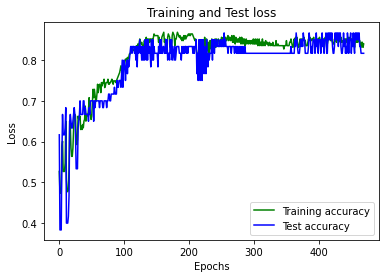

In [37]:
learning_rate = 0.01

model = Net(len(data[0][0])).to(DEVICE)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

loss_fn = nn.BCELoss()

training_loop(
n_epoch=470,
optimizer = optimizer,
model = model,
loss_fn = loss_fn,
train_loader = train_loader,
test_loader = test_loader,
print_plot = True
)
